
Compled By:
    Anuj Yadav

# Stock Market Prediction using Numerical and Text Analysis

## Numerical Analysis

In [1]:
# Importing the reqared libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader
from pandas_datareader import data as pdr
import requests
import lxml
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Importing the BSESN dataset
import yfinance as yf
yf.pdr_override() 
# download dataframe
Bsesn_Data = pdr.get_data_yahoo("^BSESN", start="2015-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
# Reading the BSESN dataset
Bsesn_Data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [4]:
# Setting up the index of BSESN dataset
Bsesn_Data.reset_index(inplace=True)

In [5]:
# Checking is there any null or NaN in BSESN dataset
Bsesn_Data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Describing the BSESN dataset
Bsesn_Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1.473000e+03
mean,32756.475177,32910.536967,32523.740065,32710.765247,32710.765247,2.303866e+05
std,5370.950712,5384.280650,5339.478124,5365.944383,5365.944383,1.942206e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,2.500000e+03
25%,27885.359375,28028.980469,27716.779297,27876.609375,27876.609375,1.020000e+04
50%,32619.259766,32748.140625,32445.429688,32597.179688,32597.179688,1.340000e+04
75%,37222.261719,37406.550781,36898.800781,37118.218750,37118.218750,1.850000e+04
max,47789.031250,47807.851562,47361.898438,47746.218750,47746.218750,3.181510e+07


In [7]:
# Checking the info about BSESN dataset
Bsesn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1473 non-null   datetime64[ns]
 1   Open       1473 non-null   float64       
 2   High       1473 non-null   float64       
 3   Low        1473 non-null   float64       
 4   Close      1473 non-null   float64       
 5   Adj Close  1473 non-null   float64       
 6   Volume     1473 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.7 KB


In [8]:
# Checking the length of BSESN dataset
len(Bsesn_Data)

1473

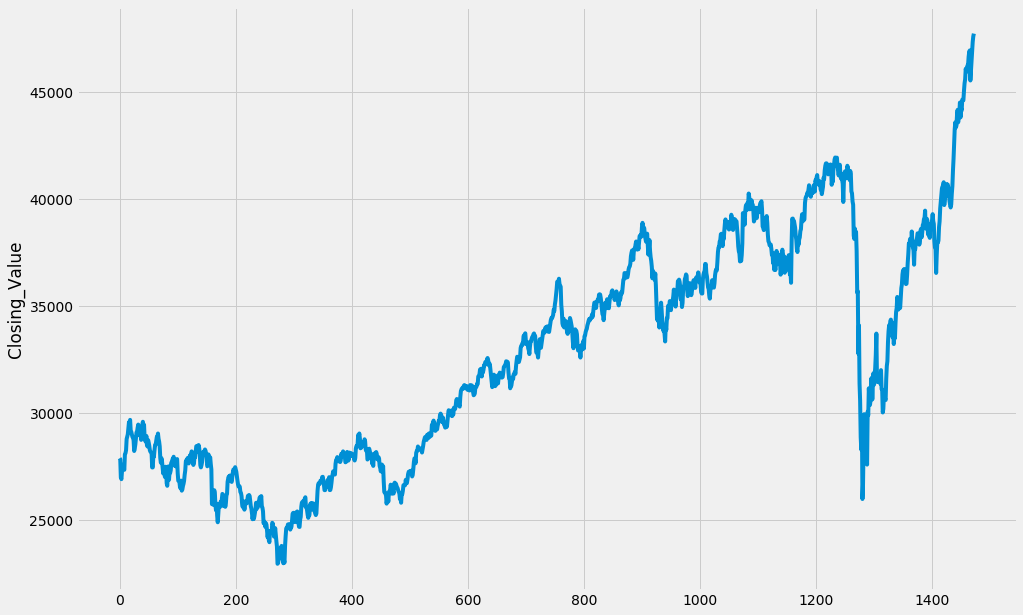

In [11]:
# Creating the plot Closeing price of BSESN dataset wrt time
plt.figure(figsize=(15,10))
Bsesn_Data["Close"].plot()
plt.ylabel("Closing_Value")
plt.show()

In [12]:
# Checking the Max. & Min. Value in Close column
Bsesn_Data["Close"].max(), Bsesn_Data["Close"].min()

(47746.21875, 22951.830078125)

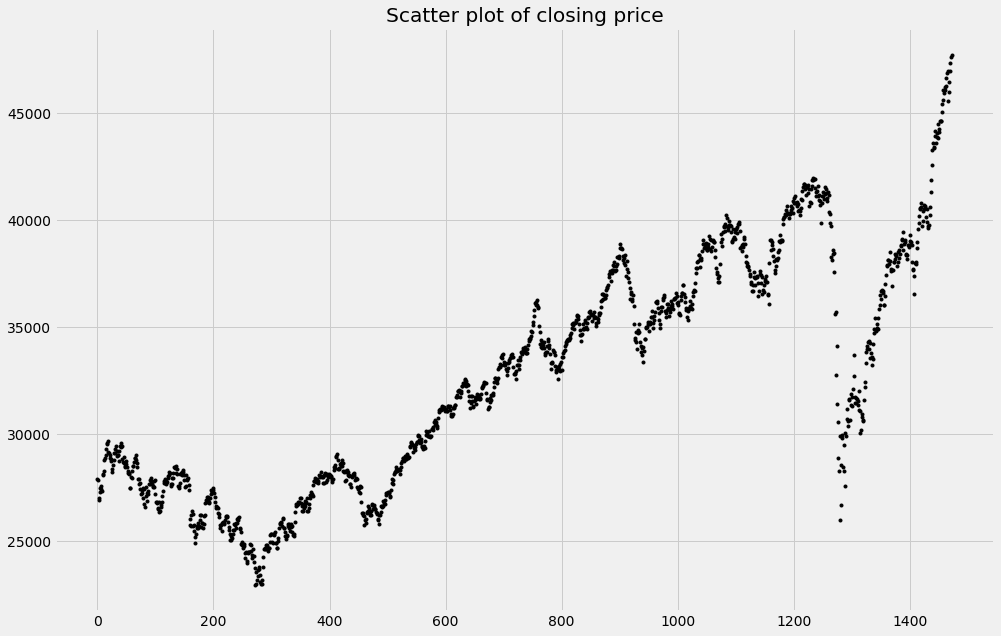

In [13]:
# Creating the scatter plot of Close column
plt.figure(figsize=(15,10))
Bsesn_Data["Close"].plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

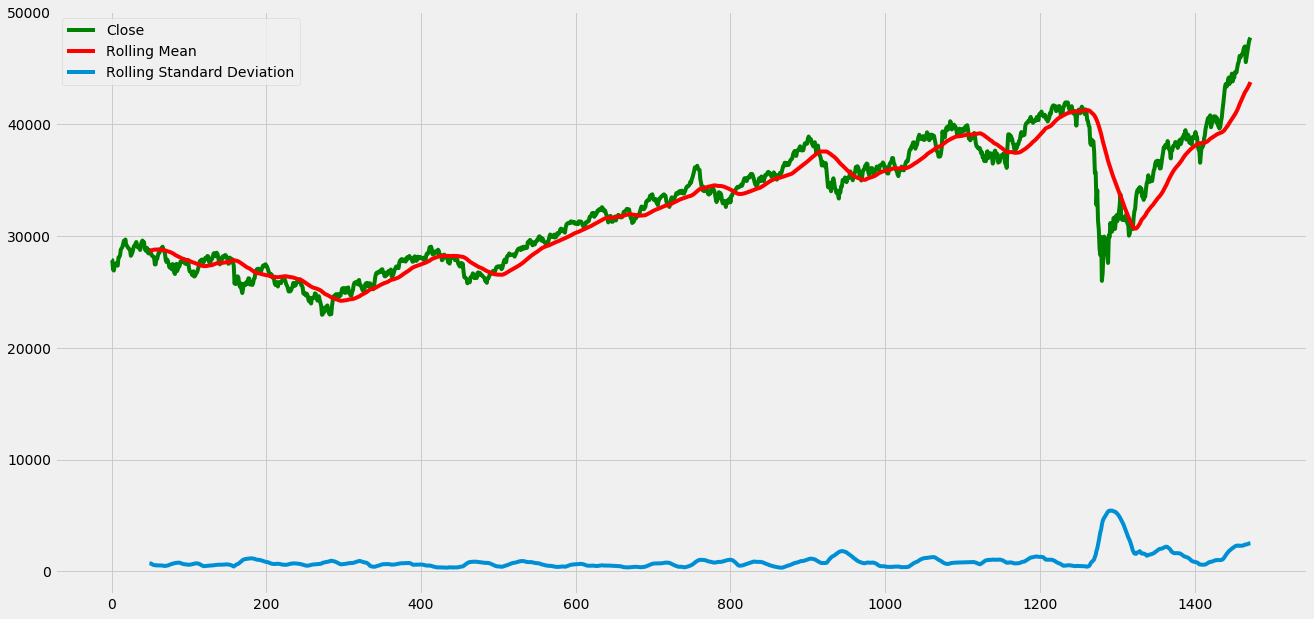

In [14]:
#Plotting moving average
close = Bsesn_Data['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
Bsesn_Data['Close'].plot(color='g',label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

Text(0.5, 1.0, 'Returns')

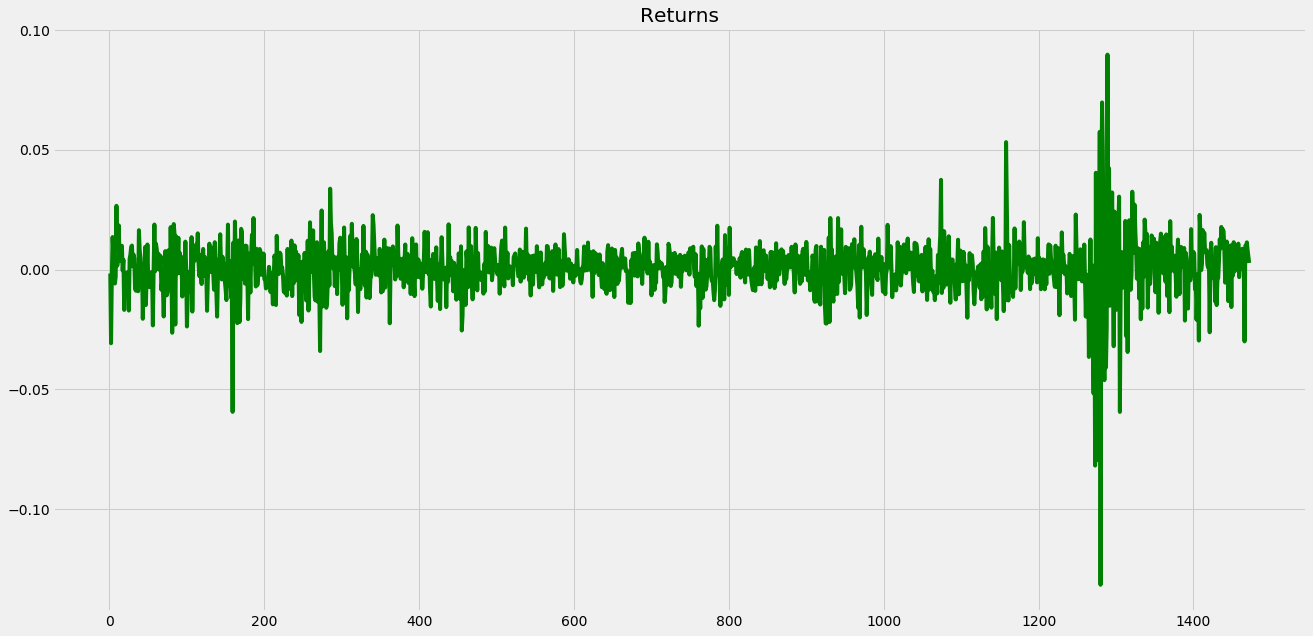

In [15]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [16]:
# Train test split
train = Bsesn_Data[:1178]
test = Bsesn_Data[1178:]

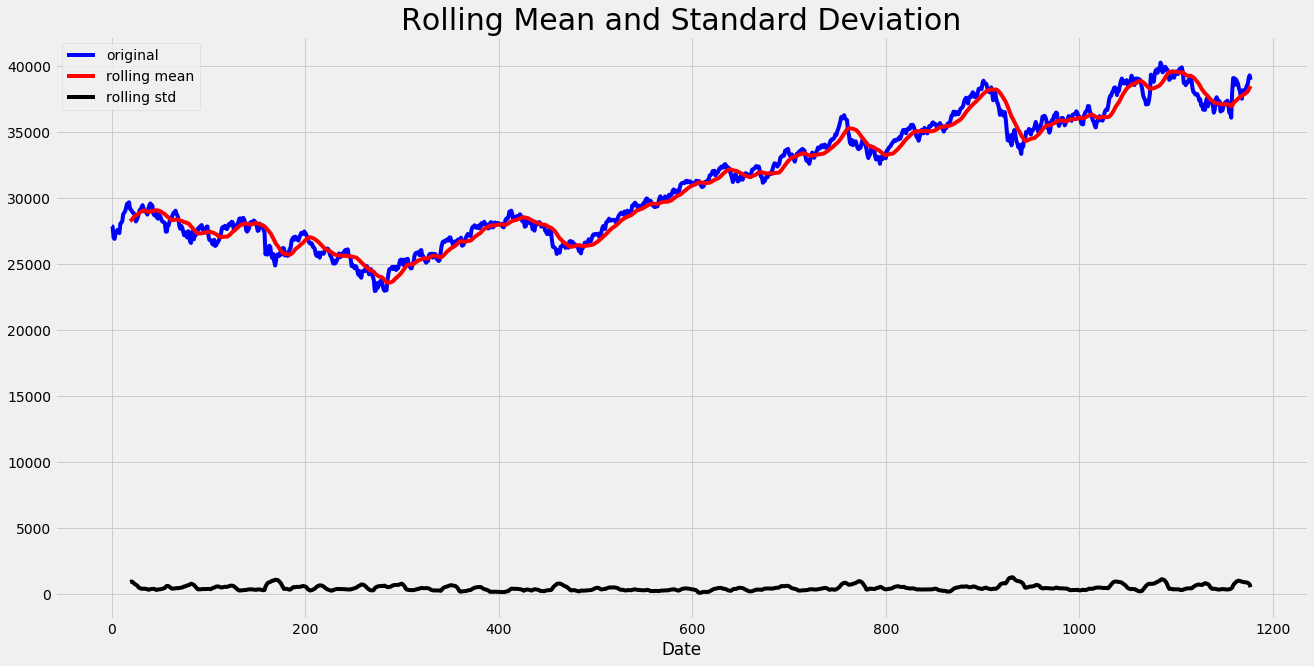

Results of dickey fuller test
ADF Test Statistic : -0.38541049078129563
p-value : 0.9125063524131913
#Lags Used : 10
Number of Observations Used : 1167
Weak evidence against null hypothesis, time series is non-stationary 


In [17]:
#Stationarity test
def test_stationarity(timeseries):

 #Determine the rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (20,10))
 plt.plot(timeseries, color = 'blue', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'black', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

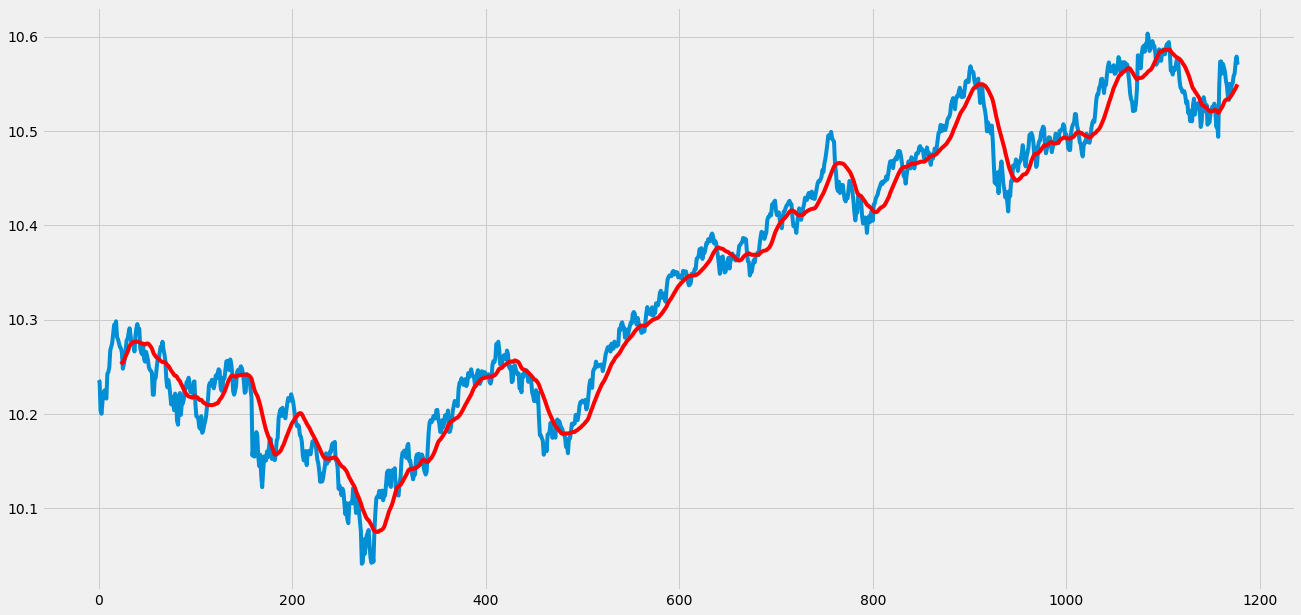

In [18]:
# Creating train & test data on log scale
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

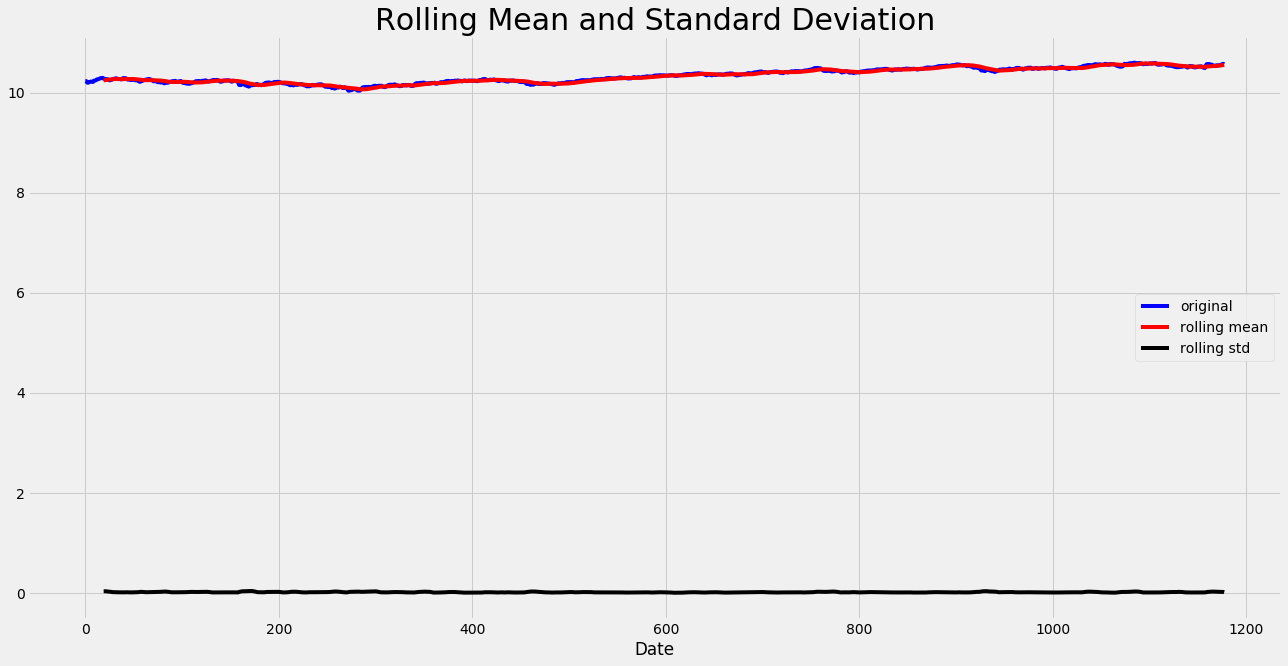

Results of dickey fuller test
ADF Test Statistic : -0.46328219832668677
p-value : 0.8989847678363831
#Lags Used : 10
Number of Observations Used : 1167
Weak evidence against null hypothesis, time series is non-stationary 


In [19]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

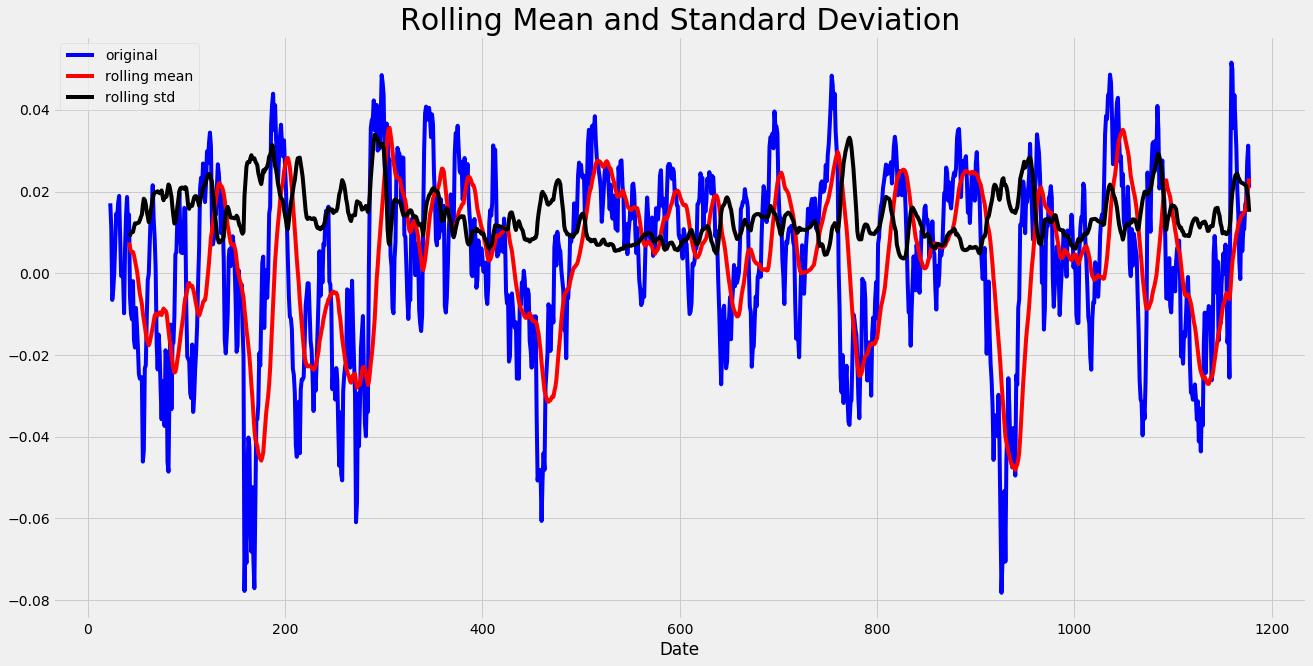

Results of dickey fuller test
ADF Test Statistic : -6.889211153063427
p-value : 1.369370820499661e-09
#Lags Used : 10
Number of Observations Used : 1144
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [20]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [21]:
# Using auto arima to make predictions using log data
from pmdarima import auto_arima

In [22]:
# Applying the Auto Arima on Dataset 
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7844.485, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7848.115, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7850.417, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7850.467, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7848.834, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7848.492, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7848.459, Time=1.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7846.471, Time=2.51 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7851.331, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7849.346, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7849.314, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7851.288, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7847.328, Time=0.51 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.997 seconds


Text(0, 0.5, 'Actual Stock Price')

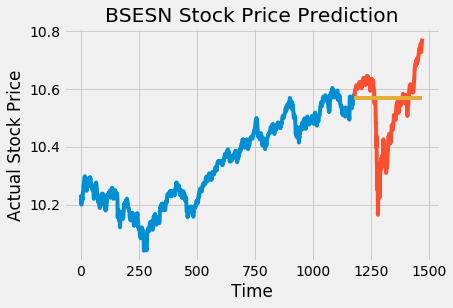

In [23]:
# Plotting the prection along with train data
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.12465610756820616


## Text Analysis

In [26]:
# Importing the reqared libraries
import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('vader_lexicon')
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91971\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91971\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Load the first dataset
columns=['Date','Category','News']
ndf = pd.read_csv("india-news-headlines.csv",names=columns)

In [28]:
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [29]:
columns=['Date','Category','News']
ndf = pd.read_csv("india-news-headlines.csv",names=columns)

In [30]:
ndf.head(5)

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [31]:
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)

Showing part of the whole dataset:


,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3424058,20201231,50 NRIs reach Singhu; offer help to farmers
3424059,20201231,Navjot Singh Sidhu tweets apology; says 'wore ...
3424060,20201231,Azim Premji organisation's name misused to che...
3424061,20201231,Get govt nod to probe officials: MP to agencies


In [32]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [33]:
ndf["Date"] = pd.to_datetime(ndf["Date"],format='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 78.4+ MB


In [34]:
# Group the headlines for each day
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace=True,drop=True)

In [35]:
ndf

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7258,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7259,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7260,2020-12-29,Man recovers charred remains of 'thief' from h...
7261,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [36]:
# Check for any duplicated values
ndf.isnull().sum()

Date    1
News    1
dtype: int64

In [37]:
ndf.dropna(inplace=True)

In [38]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7262 entries, 0 to 7262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7262 non-null   datetime64[ns]
 1   News    7262 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 170.2+ KB


In [39]:
len(ndf)

7262

In [40]:
ndf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

In [41]:

#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [42]:
ndf['Subjectivity'] = ndf['News'].apply(getSubjectivity)
ndf['Polarity'] = ndf['News'].apply(getPolarity)
ndf

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7258,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...,0.392082,0.042978
7259,2020-12-28,Horoscope Today December Check astro...,0.409973,0.071405
7260,2020-12-29,Man recovers charred remains of 'thief' from h...,0.415684,0.060775
7261,2020-12-30,Numerology Readings December Predicti...,0.436863,0.046930


In [43]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

In [44]:
ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['News']]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['News']]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['News']]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['News']]
ndf

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7258,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...,0.392082,0.042978,-0.9997,0.132,0.787,0.082
7259,2020-12-28,Horoscope Today December Check astro...,0.409973,0.071405,-0.9998,0.143,0.758,0.098
7260,2020-12-29,Man recovers charred remains of 'thief' from h...,0.415684,0.060775,-0.9999,0.154,0.748,0.098
7261,2020-12-30,Numerology Readings December Predicti...,0.436863,0.046930,-0.9999,0.150,0.764,0.086


In [45]:
df_merge = pd.merge(Bsesn_Data, ndf, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,Drink smart with these party tips How to say s...,0.454701,0.053671,-0.9997,0.149,0.733,0.117
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,Recipe Strawberry cupcakes Recipe Kaju jeera...,0.429367,0.100463,-0.9988,0.132,0.753,0.115
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,Turn to gardening for happiness Teeth jeweller...,0.388354,0.060982,-0.9997,0.120,0.798,0.082
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,Can ex lovers be friends Is water diet bad fo...,0.386384,0.033056,-1.0000,0.172,0.738,0.090
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,How to do a home manicure Recipe Spiced beetr...,0.406919,0.063963,-0.9999,0.146,0.770,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,2020-12-23,46072.300781,46513.320312,45899.101562,46444.179688,46444.179688,10500,Sawmill in Makarpura GIDC gutted none hurt Ci...,0.388435,0.075967,-0.9997,0.134,0.775,0.091
1469,2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700,How to set the mood for sex during cold winter...,0.387011,0.053569,-0.9988,0.096,0.833,0.071
1470,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600,Horoscope Today December Check astro...,0.409973,0.071405,-0.9998,0.143,0.758,0.098
1471,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800,Man recovers charred remains of 'thief' from h...,0.415684,0.060775,-0.9999,0.154,0.748,0.098


In [46]:
dfmerge1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
dfmerge1

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,27887.900391,0.454701,0.053671,-0.9997,0.149,0.733,0.117
1,27842.320312,0.429367,0.100463,-0.9988,0.132,0.753,0.115
2,26987.460938,0.388354,0.060982,-0.9997,0.120,0.798,0.082
3,26908.820312,0.386384,0.033056,-1.0000,0.172,0.738,0.090
4,27274.710938,0.406919,0.063963,-0.9999,0.146,0.770,0.084
...,...,...,...,...,...,...,...
1468,46444.179688,0.388435,0.075967,-0.9997,0.134,0.775,0.091
1469,46973.539062,0.387011,0.053569,-0.9988,0.096,0.833,0.071
1470,47353.750000,0.409973,0.071405,-0.9998,0.143,0.758,0.098
1471,47613.078125,0.415684,0.060775,-0.9999,0.154,0.748,0.098


In [47]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.199080,0.876898,0.379204,0.00015,0.464567,0.277419,0.516667
1,0.197242,0.697712,0.650861,0.00060,0.330709,0.406452,0.500000
2,0.162764,0.407626,0.421651,0.00015,0.236220,0.696774,0.225000
3,0.159592,0.393689,0.259517,0.00000,0.645669,0.309677,0.291667
4,0.174349,0.538934,0.438955,0.00005,0.440945,0.516129,0.241667


In [48]:

X=df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.876898,0.379204,0.00015,0.464567,0.277419,0.516667
1,0.697712,0.650861,0.00060,0.330709,0.406452,0.500000
2,0.407626,0.421651,0.00015,0.236220,0.696774,0.225000
3,0.393689,0.259517,0.00000,0.645669,0.309677,0.291667
4,0.538934,0.438955,0.00005,0.440945,0.516129,0.241667
...,...,...,...,...,...,...
1468,0.408198,0.508648,0.00015,0.346457,0.548387,0.300000
1469,0.398128,0.378608,0.00060,0.047244,0.922581,0.133333
1470,0.560540,0.482161,0.00010,0.417323,0.438710,0.358333
1471,0.600934,0.420444,0.00005,0.503937,0.374194,0.358333


In [49]:
Y=df['Close']
Y

0       0.199080
1       0.197242
2       0.162764
3       0.159592
4       0.174349
          ...   
1468    0.947487
1469    0.968837
1470    0.984171
1471    0.994630
1472    1.000000
Name: Close, Length: 1473, dtype: float64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(1178, 6)

In [52]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [53]:
print(prediction[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

[0.6481163  0.59789789 0.28560084 0.41907694 0.50882671 0.28986168
 0.55113211 0.34387495 0.55932455 0.49596007]
1114    0.652535
1157    0.530025
446     0.201242
853     0.497488
458     0.132118
1442    0.826444
1031    0.588191
651     0.354878
884     0.587625
420     0.224703
Name: Close, dtype: float64
Mean Squared error:  0.033231810868510764


In [54]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [55]:
print(predictions[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

[0.67732382 0.53245076 0.08125106 0.22159405 0.52934915 0.41385569
 0.75318697 0.59921139 0.71610874 0.6983754 ]
1114    0.652535
1157    0.530025
446     0.201242
853     0.497488
458     0.132118
1442    0.826444
1031    0.588191
651     0.354878
884     0.587625
420     0.224703
Name: Close, dtype: float64
Mean Squared error:  0.06578325292706563


In [56]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)


LGBMRegressor()

In [57]:
predictions = gbm.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.035601683977434254


In [58]:

xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.03952393871978981


## Conclusion: RandomForestRegressor has least Mean Squared error(MSE)
